In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
plt.rc("font", size=30)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
df=pd.read_csv('C:\\Users\\Awadhesh\\dataset1\\baseball.csv')

In [5]:
df['ERA']=df['ERA'].astype(int)


In [142]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4,7,12,35,86


In [143]:
df.tail()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5,4,4,36,95


In [123]:
df.shape

(30, 17)

In [134]:
df.dtypes

W      int64
R      int64
AB     int64
H      int64
2B     int64
3B     int64
HR     int64
BB     int64
SO     int64
SB     int64
RA     int64
ER     int64
ERA    int32
CG     int64
SHO    int64
SV     int64
E      int64
dtype: object

In [135]:
df.describe() 

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.533333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.628810,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.000000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.000000,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.000000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.000000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.000000,11.000000,21.000000,62.000000,126.000000


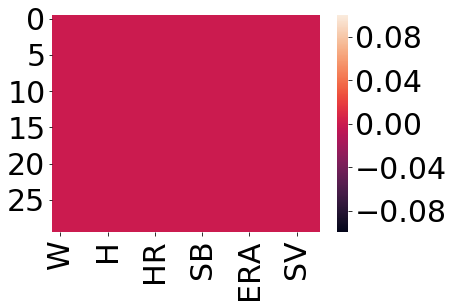

In [136]:
sns.heatmap(df.isnull())

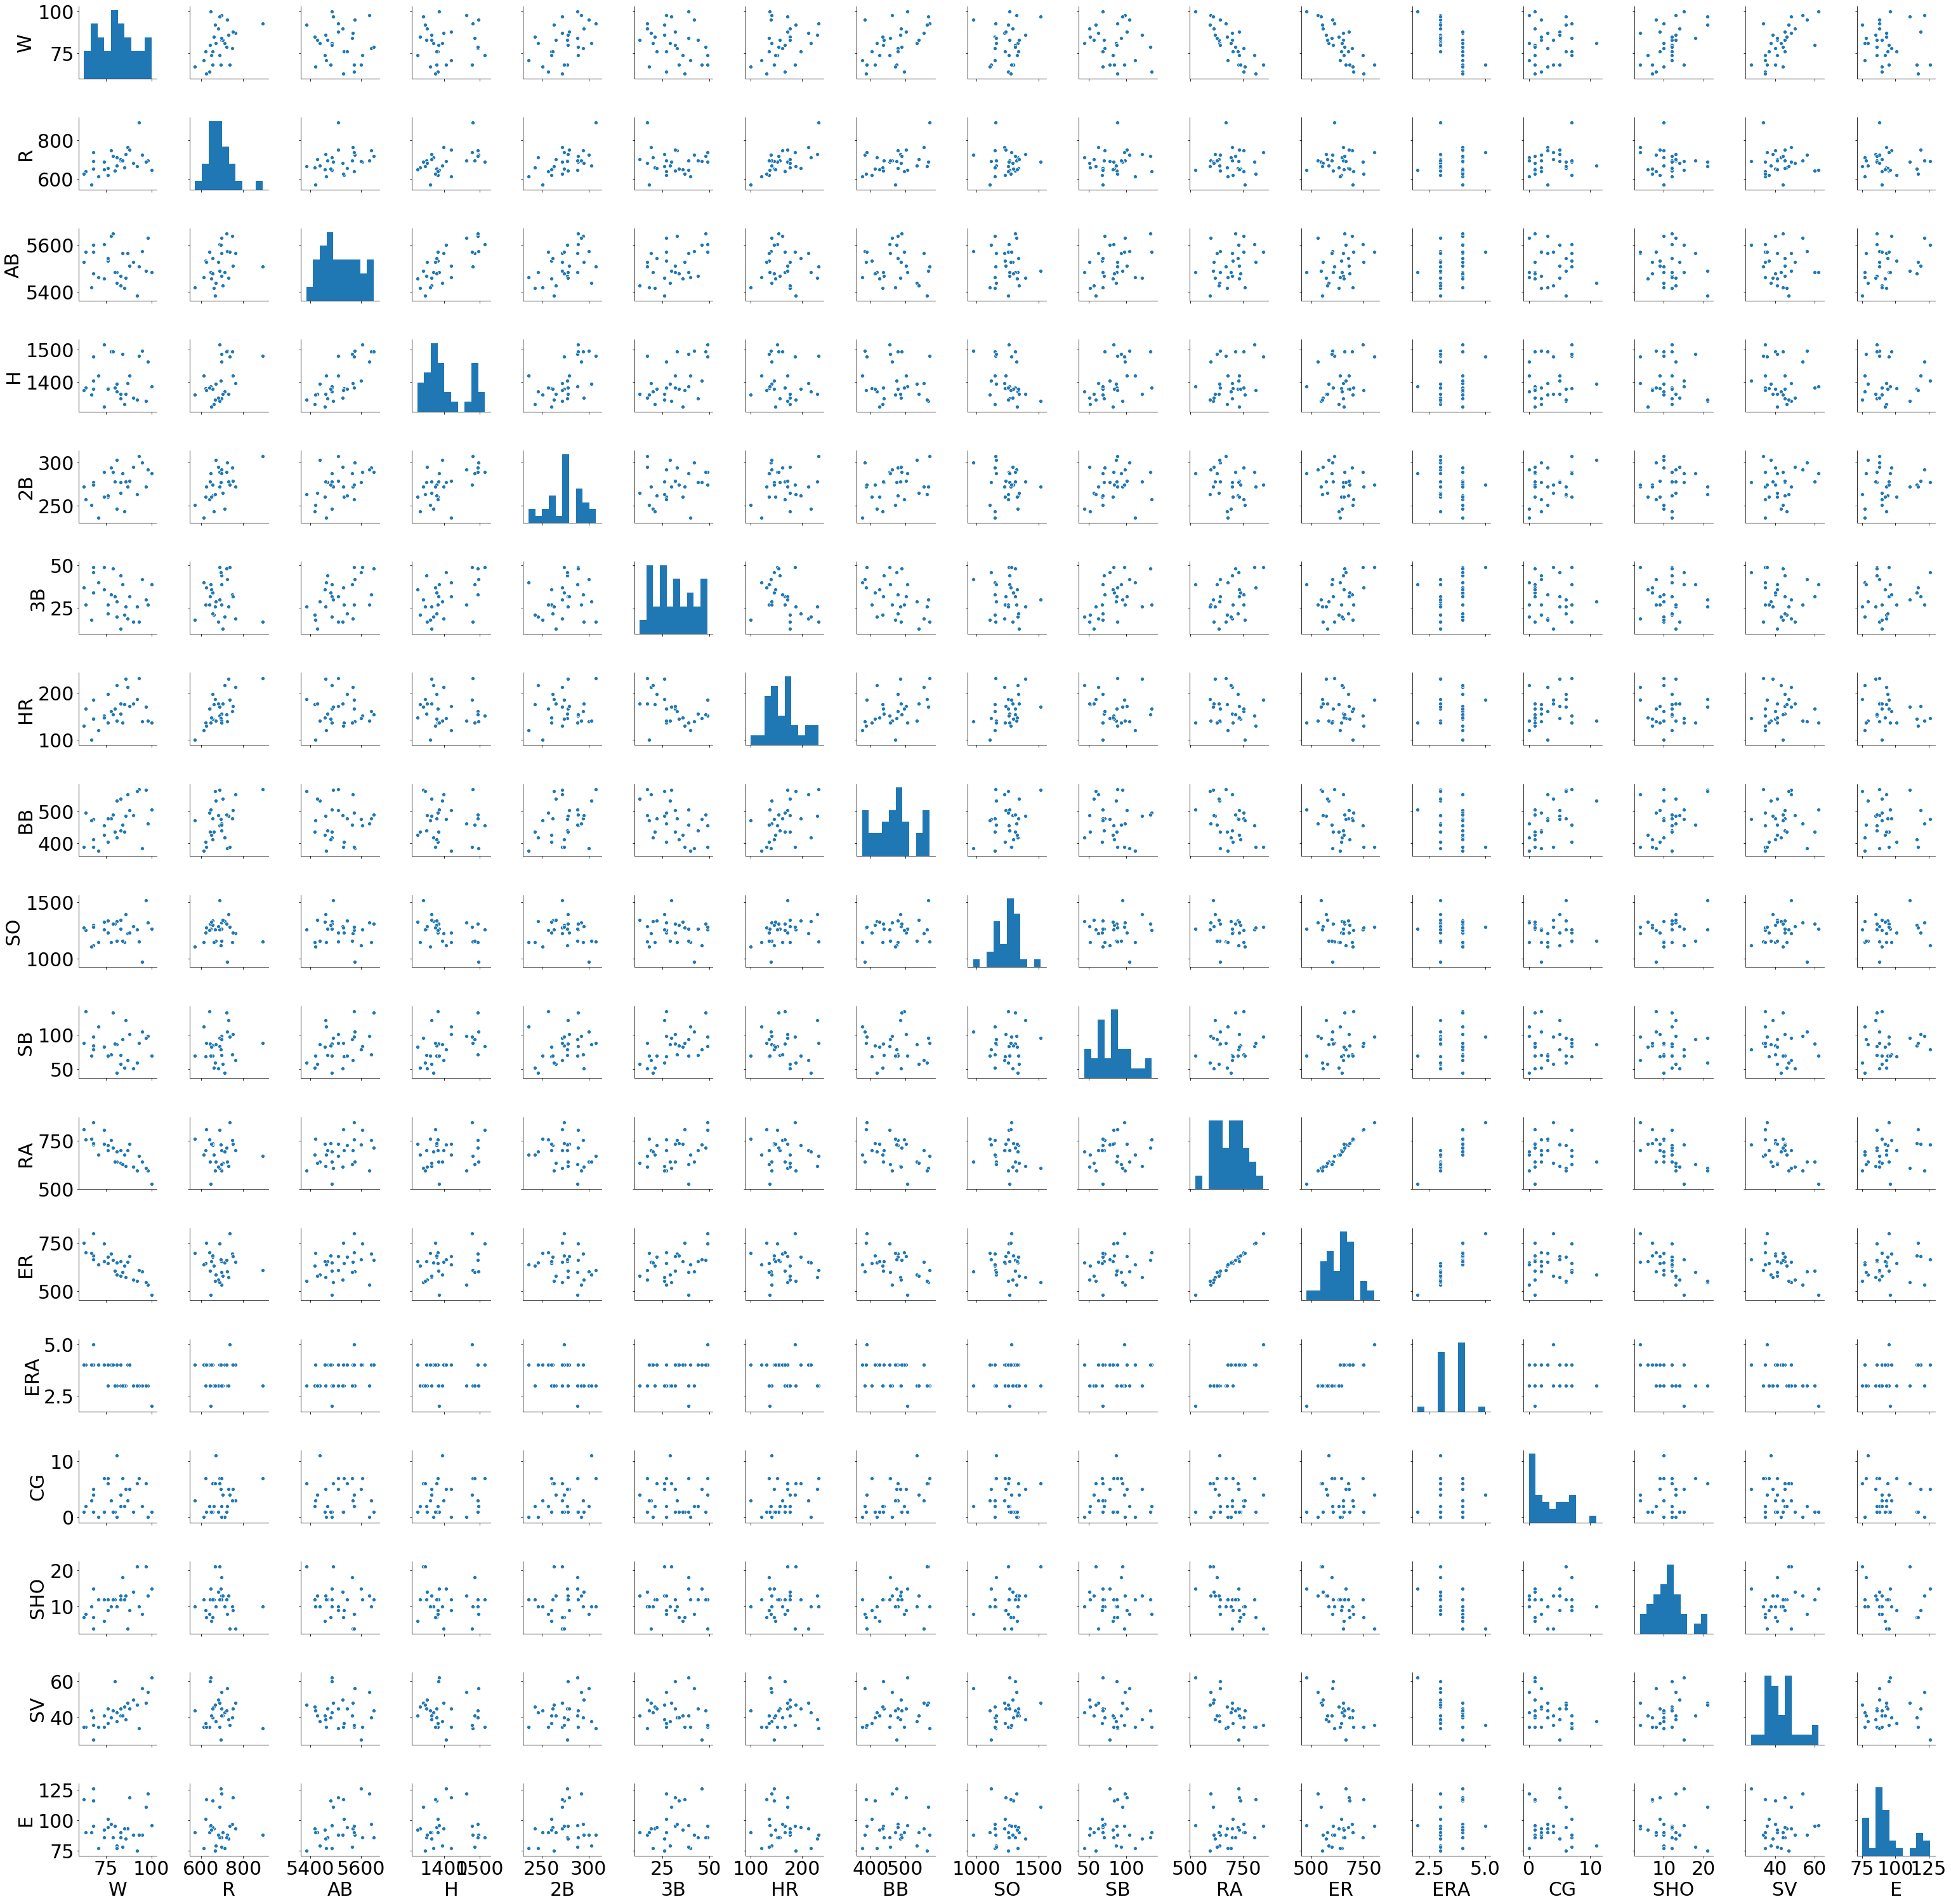

In [137]:
sns.pairplot(df)

In [161]:
x=df.iloc[:,1:17]
x

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,641,601,3,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,653,4,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,640,584,3,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,701,643,3,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,803,746,4,7,12,35,86
5,891,5509,1480,308,17,232,570,1151,88,670,609,3,7,10,34,88
6,764,5567,1397,272,19,212,554,1227,63,698,652,4,3,4,48,93
7,713,5485,1370,246,20,217,418,1331,44,693,646,4,0,10,43,77
8,644,5485,1383,278,32,167,436,1310,87,642,604,3,1,12,60,95
9,748,5640,1495,294,33,161,478,1148,71,753,694,4,3,10,40,97


In [210]:
x.shape

(30, 16)

In [211]:
y=df.iloc[:,0:1]

In [212]:
y

,W
0,95
1,83
2,81
3,76
4,74
5,93
6,87
7,81
8,80
9,78


In [213]:
train_x,test_x,train_y,test_y =train_test_split( x, y, test_size=0.33, random_state=42)

In [214]:
train_x.shape

(20, 16)

In [215]:
train_y.shape

(20, 1)

In [182]:
lr=LinearRegression()

In [183]:
lr.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [243]:
lr.score(train_x,train_y)

0.9939058046550333

In [185]:
lr.coef_

array([[ 0.09100498, -0.00937573,  0.0111097 , -0.17181784,  0.31605372,
         0.05006329, -0.01756051, -0.02353432,  0.03126465,  0.33940092,
        -0.36576975, -7.20840904,  0.51754339,  0.12907068,  1.35842533,
        -0.07525142]])

In [186]:
pred=lr.predict(test_x)

In [187]:
print(pred)

[[ 85.26026723]
 [115.14883694]
 [ 72.24731138]
 [ 93.15174856]
 [100.0065413 ]
 [ 80.10723087]
 [ 81.16981601]
 [ 60.52714471]
 [ 90.63017182]
 [110.93390139]]


In [236]:
print(test_y)

      W
27   79
15  100
23   67
17   97
8    80
9    78
28   74
24   63
12   85
0    95


In [240]:
print("Mean Absolutes Error",mean_absolute_error(test_y,pred))

Mean Absolutes Error 8.382518365811995


In [241]:
print("Mean Squarr Error",mean_squared_error(test_y,pred))

Mean Squarr Error 105.88329619177907


In [242]:
print(" Root Mean Squarr Error",np.sqrt(mean_squared_error(test_y,pred)))

 Root Mean Squarr Error 10.289960942189191


In [227]:
svc=SVC()

In [228]:
svc.fit(train_x,train_y)

C:\Users\Awadhesh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Awadhesh\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [229]:
svc.score(train_x,train_y)

1.0

In [233]:
predsvc=svc.predict(test_x)

In [234]:
predsvc

array([68, 68, 68, 68, 68, 68, 68, 68, 68, 68], dtype=int64)

In [235]:
print(accuracy_score(test_y,predsvc))

0.0


In [239]:
print(confusion_matrix(test_y,predsvc))

[[0 0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0]]
